In [1]:
import sys, os
import matplotlib.pyplot as plt
sys.path.append('../')
from sklearn.metrics import mean_squared_error
import re
import numpy as np

In [2]:
import torch

In [3]:
%matplotlib inline

In [4]:
regex = re.compile(r'\d+')

In [5]:
predicted = '/storage/yw18581/src/leaf_reco/saved_models/trained_6positions_multi_loss/predicted'

In [6]:
saved_models = '/storage/yw18581/src/leaf_reco/saved_models/trained_6positions_multi_loss/'

In [7]:
model_names = os.listdir(saved_models)

In [21]:
def get_fnames(coeff, prefix='Trained'):
    idx_coef = 6 if prefix=='Trained' else 4
    idx_epoch = 5 if prefix =='Trained' else 3
    f_list = []
    epochs = []
    model_names = os.listdir(saved_models) if prefix=='Trained' else os.listdir(predicted)
    for fname in model_names:
        if fname.startswith(prefix):
            if regex.findall(fname.split("_")[idx_coef])[1]==str(coeff):
                epoch = int(regex.findall(fname.split("_")[idx_epoch])[0]) 
                epochs.append(epoch)
                if int(regex.findall(fname.split("_")[idx_epoch])[0])==epoch:
                    f_list.append(fname)
    
    return np.array(f_list)[np.argsort(epochs)], np.sort(epochs)

In [9]:
from functools import partial

In [10]:
root_path = partial(os.path.join, saved_models)

In [27]:
root_path_pred = partial(os.path.join, predicted)

In [11]:
best_models = []

In [12]:
coeffs = [25, 3, 4, 5, 6, 7, 75]

In [14]:
for c in coeffs:
    fnames, _ = get_fnames(c)
    print(c)
    losses_c = [(p, torch.load(p)['val_loss']) for p in map(lambda f: root_path(f), fnames)]
    print(len(losses_c))
    best_models.append(min(losses_c, key=lambda e: e[1]))

25
20
3
20
4
20
5
20
6
20
7
20
75
20


In [15]:
best_models

[('/storage/yw18581/src/leaf_reco/saved_models/trained_6positions_multi_loss/Trained_rUNet_pytorch_6positions_dataset_15epochs_0.25coeff_mask.pkl',
  -0.18855425273930584),
 ('/storage/yw18581/src/leaf_reco/saved_models/trained_6positions_multi_loss/Trained_rUNet_pytorch_6positions_dataset_80epochs_0.3coeff_mask.pkl',
  0.002221730110856394),
 ('/storage/yw18581/src/leaf_reco/saved_models/trained_6positions_multi_loss/Trained_rUNet_pytorch_6positions_dataset_100epochs_0.4coeff_mask.pkl',
  -0.38123128480381435),
 ('/storage/yw18581/src/leaf_reco/saved_models/trained_6positions_multi_loss/Trained_rUNet_pytorch_6positions_dataset_25epochs_0.5coeff_mask.pkl',
  -0.460439998794485),
 ('/storage/yw18581/src/leaf_reco/saved_models/trained_6positions_multi_loss/Trained_rUNet_pytorch_6positions_dataset_80epochs_0.6coeff_mask.pkl',
  0.0012401096755638719),
 ('/storage/yw18581/src/leaf_reco/saved_models/trained_6positions_multi_loss/Trained_rUNet_pytorch_6positions_dataset_45epochs_0.7coeff_mas

In [16]:
best_models_path = [e[0] for e in best_models]

In [17]:
best_models_path

['/storage/yw18581/src/leaf_reco/saved_models/trained_6positions_multi_loss/Trained_rUNet_pytorch_6positions_dataset_15epochs_0.25coeff_mask.pkl',
 '/storage/yw18581/src/leaf_reco/saved_models/trained_6positions_multi_loss/Trained_rUNet_pytorch_6positions_dataset_80epochs_0.3coeff_mask.pkl',
 '/storage/yw18581/src/leaf_reco/saved_models/trained_6positions_multi_loss/Trained_rUNet_pytorch_6positions_dataset_100epochs_0.4coeff_mask.pkl',
 '/storage/yw18581/src/leaf_reco/saved_models/trained_6positions_multi_loss/Trained_rUNet_pytorch_6positions_dataset_25epochs_0.5coeff_mask.pkl',
 '/storage/yw18581/src/leaf_reco/saved_models/trained_6positions_multi_loss/Trained_rUNet_pytorch_6positions_dataset_80epochs_0.6coeff_mask.pkl',
 '/storage/yw18581/src/leaf_reco/saved_models/trained_6positions_multi_loss/Trained_rUNet_pytorch_6positions_dataset_45epochs_0.7coeff_mask.pkl',
 '/storage/yw18581/src/leaf_reco/saved_models/trained_6positions_multi_loss/Trained_rUNet_pytorch_6positions_dataset_95epo

In [18]:
m = best_models_path[0]

In [19]:
ep = int(regex.findall(os.path.split(m)[1].split('_')[5])[0])

In [20]:
coef = int(regex.findall(os.path.split(m)[1].split('_')[6])[1])

In [22]:
fnames_c, epochs_c = get_fnames(coef, 'predicted_unseen')

In [28]:
predicted_path = root_path_pred(fnames_c[np.where(epochs_c==ep)[0]][0])

In [29]:
predicted_path

'/storage/yw18581/src/leaf_reco/saved_models/trained_6positions_multi_loss/predicted/predicted_unseen_6positions_15epochs_0.25coeff.npz'

In [30]:
preds = np.load(predicted_path)

In [31]:
y_true, y_pred = preds['true'], preds['pred']

In [32]:
mean_squared_error(y_true, y_pred)

0.08659245959772904

In [33]:
def mse(model_path, dataset='predicted_unseen'):
    ep = int(regex.findall(os.path.split(model_path)[1].split('_')[5])[0])
    coef = int(regex.findall(os.path.split(model_path)[1].split('_')[6])[1])
    fnames_c, epochs_c = get_fnames(coef, dataset)
    predicted_path = root_path_pred(fnames_c[np.where(epochs_c==ep)[0]][0])
    preds = np.load(predicted_path)
    y_true, y_pred = preds['true'], preds['pred']
    return mean_squared_error(y_true, y_pred) 

In [34]:
errors = []
for m in best_models_path:
    err_unseen = mse(m, dataset='predicted_unseen')
    err_testdata = mse(m, dataset='predicted_testdata')
    errors.append((err_testdata, err_unseen))

In [35]:
errors

[(0.0511876213069071, 0.08659245959772904),
 (0.0033133811181023593, 0.30365798438717256),
 (0.0026834273776038275, 0.06758250927755269),
 (0.03613546595227481, 0.08376996810974148),
 (0.003917962829968765, 0.04251767156385941),
 (0.012022597925598538, 0.07326365416361053),
 (0.00249315893123111, 0.7395310539339406)]

In [36]:
delta=[abs(e[1]-e[0]) for e in errors]

In [37]:
delta

[0.035404838290821944,
 0.3003446032690702,
 0.06489908189994886,
 0.04763450215746667,
 0.038599708733890646,
 0.06124105623801199,
 0.7370378950027094]

In [38]:
def idx_mse(dist, true_arr, preds_arr):
    idx = np.where(true_arr==dist)[0]
    mse = mean_squared_error(true_arr[idx], preds_arr[idx])
    print(dist, mse)
    return idx, mse 

In [39]:
distances_unseen = [1,3,15,30]
distances_testdata = [2,4,10,20,25,35]

In [40]:
ms = [idx_mse(d, preds_arr=y_pred, true_arr=y_true) for d in distances_unseen]

1 0.16633411458258246
3 0.04388226151343379
15 0.034677299313313294
30 0.09824917023743991


In [43]:
def mse_positions(model_path, dataset='predicted_unseen', dist=distances_unseen):
    mse=[]
    avg=[]
    std=[]
    ep = int(regex.findall(os.path.split(model_path)[1].split('_')[5])[0])
    coef = int(regex.findall(os.path.split(model_path)[1].split('_')[6])[1])
    fnames_c, epochs_c = get_fnames(coef, dataset)
    predicted_path = root_path_pred(fnames_c[np.where(epochs_c==ep)[0]][0])
    print(predicted_path)
    preds = np.load(predicted_path)
    y_true, y_pred = preds['true'], preds['pred']
    for d in dist:
        idx = idx_mse(d, preds_arr=y_pred, true_arr=y_true)[0]
        y_true_d = y_true[idx]
        y_pred_d = y_pred[idx]
        mse_d = mean_squared_error(y_true_d, y_pred_d)
        avg_pred = np.mean(y_pred_d)
        std_pred = np.std(y_pred_d)
        mse.append(mse_d)
        avg.append(avg_pred)
        std.append(std_pred)
    return mse, avg, std

In [44]:
mse_unseen, avg_unseen, std_unseen = mse_positions(best_models_path[0])

/storage/yw18581/src/leaf_reco/saved_models/trained_6positions_multi_loss/predicted/predicted_unseen_6positions_15epochs_0.25coeff.npz
1 0.16633411458258246
3 0.04388226151343379
15 0.034677299313313294
30 0.09824917023743991


In [45]:
mse_test, avg_test, std_test = mse_positions(best_models_path[0], dataset='predicted_testdata', dist=distances_testdata)

/storage/yw18581/src/leaf_reco/saved_models/trained_6positions_multi_loss/predicted/predicted_testdata_6positions_15epochs_0.25coeff.npz
2 0.03189775379244543
4 0.029517866547544996
10 0.022916869786860864
20 0.047438611624310546
25 0.05192288959000338
35 0.12810193414814597


In [46]:
mse_unseen

[0.16633411458258246,
 0.04388226151343379,
 0.034677299313313294,
 0.09824917023743991]

In [47]:
distances = distances_unseen+distances_testdata

In [48]:
errs = mse_unseen+mse_test

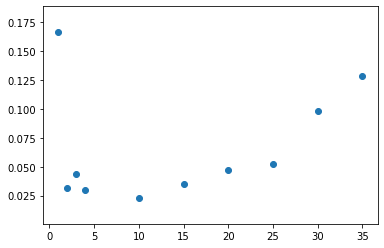

In [49]:
plt.scatter(distances, errs)

In [50]:
avg_unseen

[1.389318, 3.0299623, 15.1176195, 30.109148]

In [51]:
avg_test

[2.1087594, 3.9540784, 9.974408, 19.969221, 24.909945, 34.901585]

In [52]:
avg = avg_unseen+avg_test

In [54]:
std = std_unseen+std_test

In [56]:
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

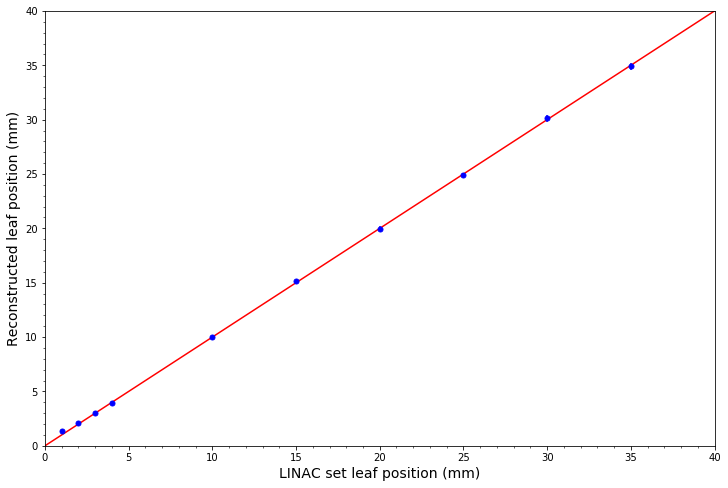

In [57]:
#plt.plot(np.sort(distances), np.array(avg)[np.argsort(distances)])
fig, ax = plt.subplots(figsize=(12,8))

ax.errorbar(np.sort(distances), np.array(avg)[np.argsort(distances)], 
                                np.array(std)[np.argsort(distances)], fmt='o',markersize=5, capsize=0, c='b',ecolor='b')
ax.plot(np.arange(0,50), np.arange(0,50),c='red')
#plt.xticks(np.arange(0,40,5))
#plt.yticks(np.arange(0,40,5))
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.xaxis.set_minor_locator(MultipleLocator(1))

ax.yaxis.set_minor_locator(MultipleLocator(1))
ax.set_ylabel("Reconstructed leaf position (mm)", size=14)
ax.set_xlabel("LINAC set leaf position (mm)", size=14)
ax.set_xlim(0,40)
ax.set_ylim(0,40)
#plt.show()
plt.savefig("reconstructed_vs_true_linear.png")

In [181]:
resolutions = [0.04625, 0.04056, 0.08755, 0.04703, 0.04296, 0.04605,0.049,  0.04191, 0.05296, 0.04766 ]

In [179]:
bars = [0.00112, 0.00253, 0.00291, 0.00382, 0.00314, 0.00119,0.003,  0.00299, 0.00150, 0.00329]

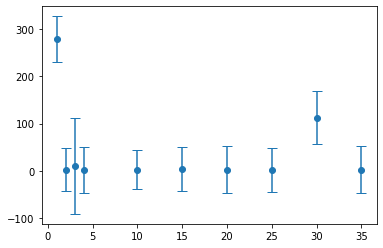

In [168]:
plt.errorbar(np.sort(distances), 
             np.array(errs)[np.argsort(distances)]*1000, 
             np.array(std)[np.argsort(distances)]*1000,
             fmt='o', capsize=5)
#plt.ylim(0,120)
plt.show()

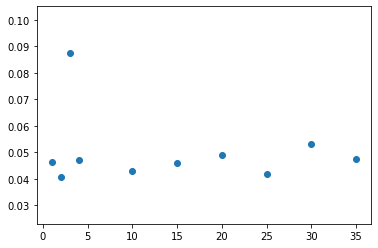

In [183]:
plt.scatter(np.sort(distances), resolutions)

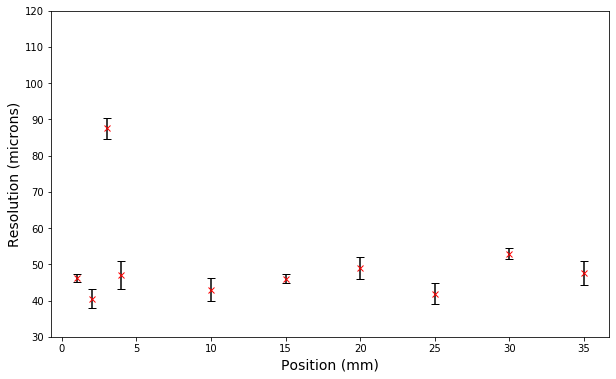

In [214]:
plt.figure(figsize=(10,6))
plt.errorbar(np.sort(distances), 
             np.array(resolutions)*1000, 
             np.array(bars)*1000,
             fmt='x', capsize=4, c='red',ecolor='k')
plt.xticks(np.arange(0,40,5))
plt.ylabel("Resolution (microns)", size=14)
plt.xlabel("Position (mm)", size=14)
plt.ylim(30,120)
plt.show()

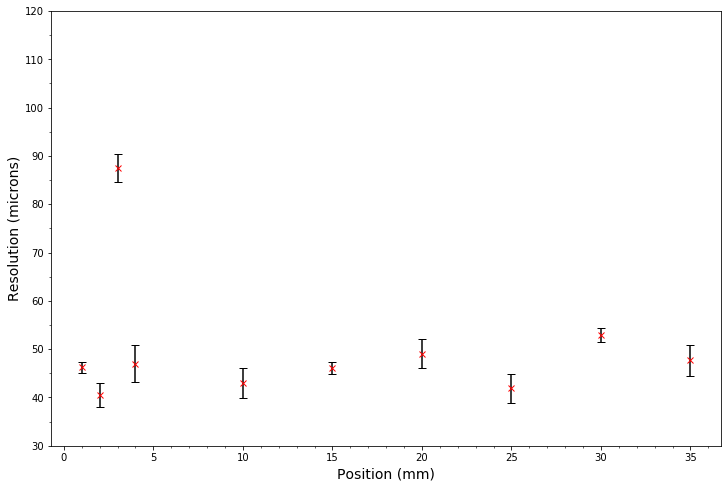

In [271]:
#plt.figure(figsize=(10,6))
fig, ax = plt.subplots(figsize=(12,8))
ax.errorbar(np.sort(distances), 
             np.array(resolutions)*1000, 
             np.array(bars)*1000,
             fmt='x', capsize=4, c='red',ecolor='k')
#ax.xticks(np.arange(0,40,5))
ax.set_ylabel("Resolution (microns)", size=14)
ax.set_xlabel("Position (mm)", size=14)
ax.set_ylim(30,120)

ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(5))
#plt.show()
plt.savefig("resolution_vs_position.png")